<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/CAUSAL_EFFECT_OF_HIGH_BLOOD_PRESSURE_AND_HEART_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DOES HIGH BLOOD PRESSURE CAUSE HEART DISEASE**

In this study we will use heart disease data gotten from Kaggle to find the casual effect of bloodpressure on heart disease.
The goal here is to understand if high blood pressure causes heart disease
The sample consists of the age,cholestrol,bloodpressure measurment,fasting blood sugar,sex,heartbeat results of 1025 patients.

## **INSTALLING DOWHY AND LOADING DATA**

In [ ]:
pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'INFO',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## **CREATING THE TREATMENT,OUTCOME AND W0 VARIABLE**

In [ ]:
rvar = 1 if np.random.uniform() >0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,
                                      num_common_causes=1,sd_error = 0.2)
df = data_dict['df']
Treatment = 'trestbps'
Outcome = ('target')  # Corrected the syntax for defining a tuple
w0 = 'chol'
print(df[["Treatment", "Outcome", "w0"]].head())

   Treatment    Outcome        w0
0   5.158196  10.488911 -0.335517
1   9.357750  18.787327  3.253793
2   9.873024  19.675749  3.990434
3   1.219663   2.252565 -4.848147
4   2.057737   4.321787 -3.719936


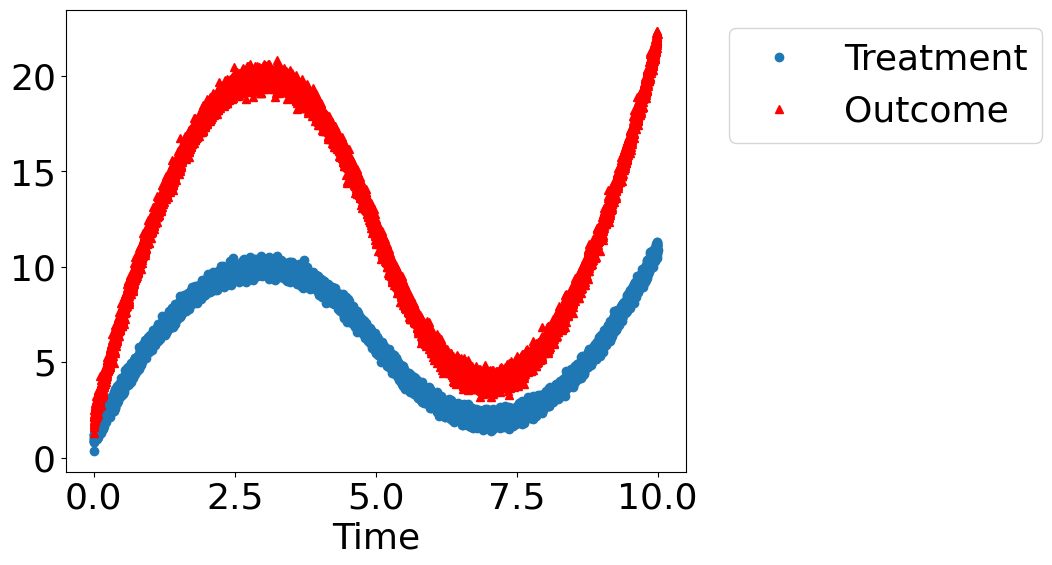

In [ ]:
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])

# **CASUAL GRAPH**

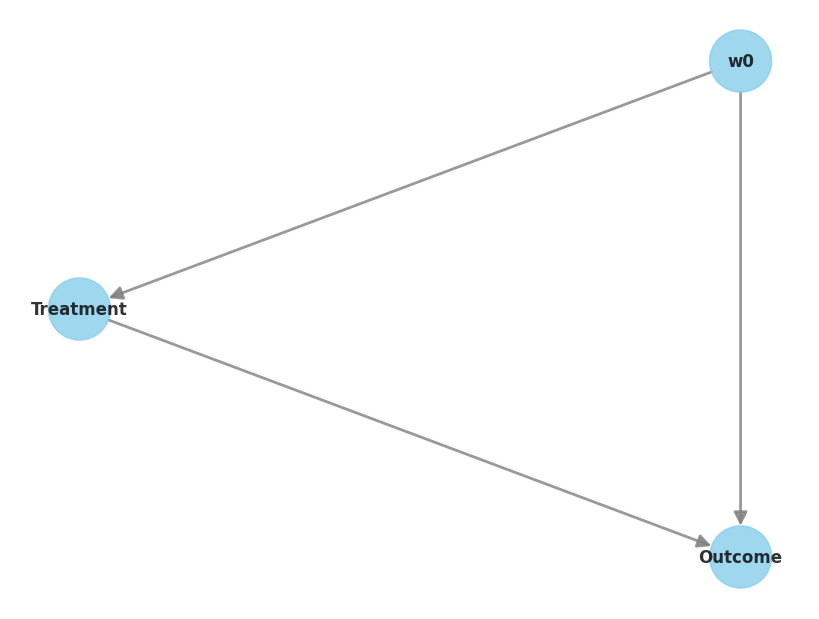

In [ ]:
model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model(layout="dot")

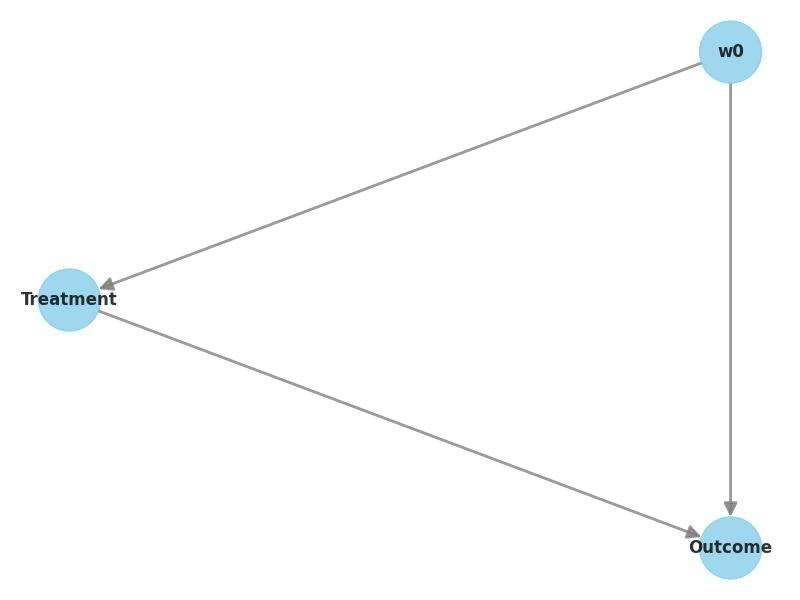

In [ ]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## **IDENTIFYING CASUAL EFFECT**

With the casual graph,we can identify the casual effect using the properties from the casual graph above.

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[Outcome|w0])
d[Treatment]               
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
linear_estimate = model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression",
                                       control_value=0,
                                       treatment_value=1)
print(linear_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[Outcome|w0])
d[Treatment]               
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)

## Realized estimand
b: Outcome~Treatment+w0
Target units: ate

## Estimate
Mean value: 1.0110269545736523



## **CASUAL EFFECT ESTIMATION**

With the estimand identified, we can use linear regression to estimate the casual effect.

Causal Estimate is 1.0110269545736523


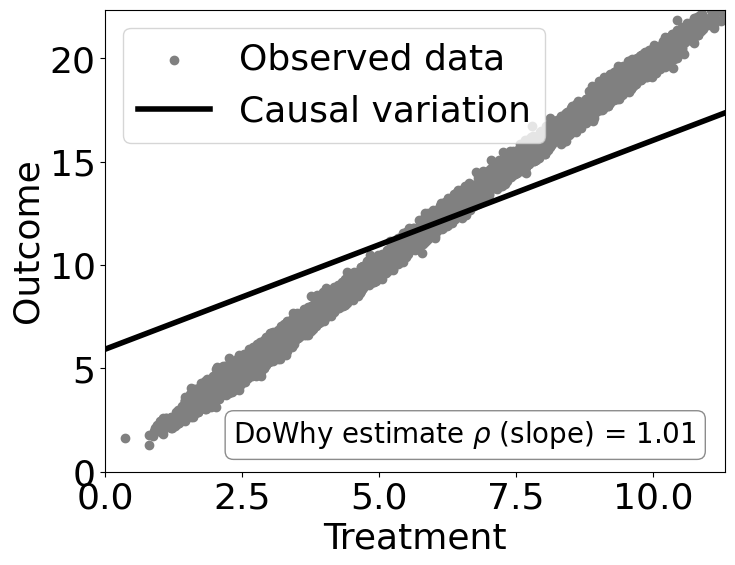

In [ ]:
 estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

 Our casual estimate is 1.0110269545736523


 We check if the estimate is correct

In [ ]:
print("DoWhy estimate is " + str(estimate.value))
print ("Actual true causal effect was {0}".format(rvar))

DoWhy estimate is 1.0110269545736523
Actual true causal effect was 1


## **REFUTING THE ESTIMAND**

In [ ]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:1.0110269545736523
New effect:1.0110251960355843
p value:0.94



## **PLACEBO TREATMENT REFUTER**

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:1.0110269545736523
New effect:5.2199373803833996e-05
p value:1.0



## **DATA SUBSET REFUTER**

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)


Refute: Use a subset of data
Estimated effect:1.0110269545736523
New effect:1.0113379827265916
p value:0.8200000000000001

